PROJECT NAME: Magnitude of Surgical Site Infections (SSIs) and Associated Factors among Post-Operative Patients at Myungsung Christian Medical Centre

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
ssi_data = pd.read_csv('/content/data/SSI Data.csv')
# Identify columns that are of object type (string columns)
object_columns = ssi_data.select_dtypes(include=['object']).columns

# One-hot encode the object columns
for col in object_columns:
    encoder = OneHotEncoder(sparse_output=False)  # Updated parameter based on warning
    encoded_data = encoder.fit_transform(ssi_data[[col]])
    # Create a DataFrame from the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    # Drop the original column and concatenate the encoded DataFrame
    ssi_data = ssi_data.drop(col, axis=1).reset_index(drop=True)
    ssi_data = pd.concat([ssi_data, encoded_df], axis=1)

# Replace spaces or any other non-numeric placeholder with NaN and then fill with 0
ssi_data = ssi_data.replace(' ', np.nan).fillna(0)

# Assuming 'SSI' is the target column
X = ssi_data.drop('SSI', axis=1)
y = ssi_data['SSI']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming your preprocessing steps are already done and you have X_train, X_test, y_train, y_test ready

# Define the model
model = Sequential([
    # Input layer & first hidden layer
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # You can add more hidden layers if needed
    # Output layer - using sigmoid activation function for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0451 - loss: 63583.7500 - val_accuracy: 0.0556 - val_loss: 37528.9531
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0451 - loss: 29515.7812 - val_accuracy: 0.1481 - val_loss: 4299.5625
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5591 - loss: 2053.1897 - val_accuracy: 0.9444 - val_loss: 873.5782
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9570 - loss: 1116.7051 - val_accuracy: 0.9444 - val_loss: 1544.1913
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9649 - loss: 1282.5663 - val_accuracy: 0.9444 - val_loss: 1830.6694
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9606 - loss: 1578.7834 - val_accuracy: 0.9444 - val_loss: 1900.3693
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9566 - loss: 1870.0605 - val_accuracy: 0.9444 - val_loss: 1855.0626
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9617 - loss: 1550.830

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Make predictions
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int) # Convert probabilities to binary predictions

# Generate confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Confusion Matrix:
[[64  3]
 [ 1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.00      0.00      0.00         1

    accuracy                           0.94        68
   macro avg       0.49      0.48      0.48        68
weighted avg       0.97      0.94      0.96        68



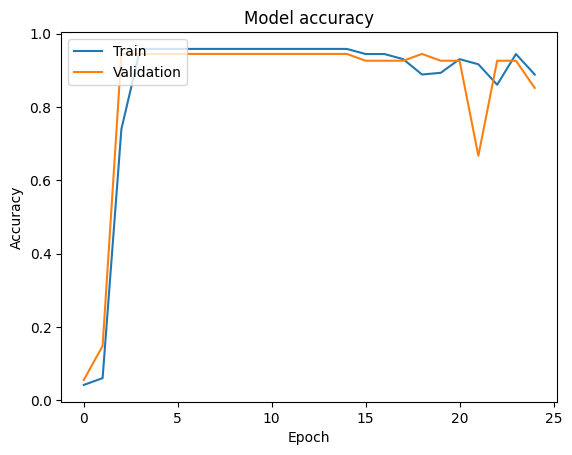

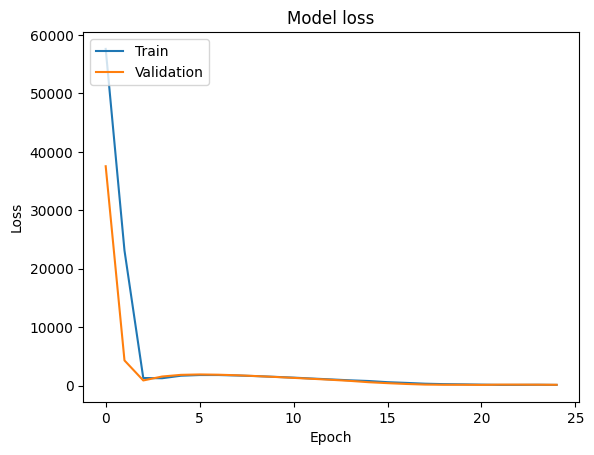

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


optimized

In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.pipeline import Pipeline

# Define the model
logreg = LogisticRegression(max_iter=1000)

# Feature selection using RFECV (Recursive Feature Elimination with Cross-Validation)
selector = RFECV(estimator=logreg, step=1, cv=5)

# Hyperparameters to tune
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2'],
}

# Note: 'logreg__' prefix in param_grid is because of the named step in the pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('feature_selection', selector),
                           ('logreg', logreg)])

# GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Running GridSearchCV with the adjusted parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Predict on the testing set
y_pred = grid_search.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'logreg__C': 1, 'logreg__penalty': 'l2'}
Best CV score: 0.9591893780573025
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.9852941176470589
Confusion Matrix:
[[67  0]
 [ 1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       0.00      0.00      0.00         1

    accuracy                           0.99        68
   macro avg       0.49      0.50      0.50        68
weighted avg       0.97      0.99      0.98        68



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9483 - loss: 2074.7610 - val_accuracy: 0.3333 - val_loss: 1421.2291
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7005 - loss: 939.4211 - val_accuracy: 0.9444 - val_loss: 863.2610
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9559 - loss: 721.4096 - val_accuracy: 0.9444 - val_loss: 715.7657
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9639 - loss: 419.2692 - val_accuracy: 0.9444 - val_loss: 151.1080
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7898 - loss: 208.7024 - val_accuracy: 0.9444 - val_loss: 625.9620
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9707 - loss: 382.5173 - val_accuracy: 0.9444 - val_loss: 745.9197
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9643 - loss: 397.6769 - val_accuracy: 0.9444 - val_loss: 370.7955
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8859 - loss: 148.6647 - val_accuracy: 0.9444 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9383 - loss: 542.3896 - val_accuracy: 0.9444 - val_loss: 242.2253
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9766 - loss: 283.6695 - val_accuracy: 0.9444 - val_loss: 670.9352
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9305 - loss: 309.8663 - val_accuracy: 0.9444 - val_loss: 355.0690
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9338 - loss: 180.0337 - val_accuracy: 0.9444 - val_loss: 132.6127
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9621 - loss: 185.0802 - val_accuracy: 0.9444 - val_loss: 254.0505
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8939 - loss: 315.0034 - val_accuracy: 0.9444 - val_loss: 255.4660
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9626 - loss: 255.5177 - val_accuracy: 0.9444 - val_loss: 257.8792
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9025 - loss: 229.8407 - val_accuracy: 0.9259 - val

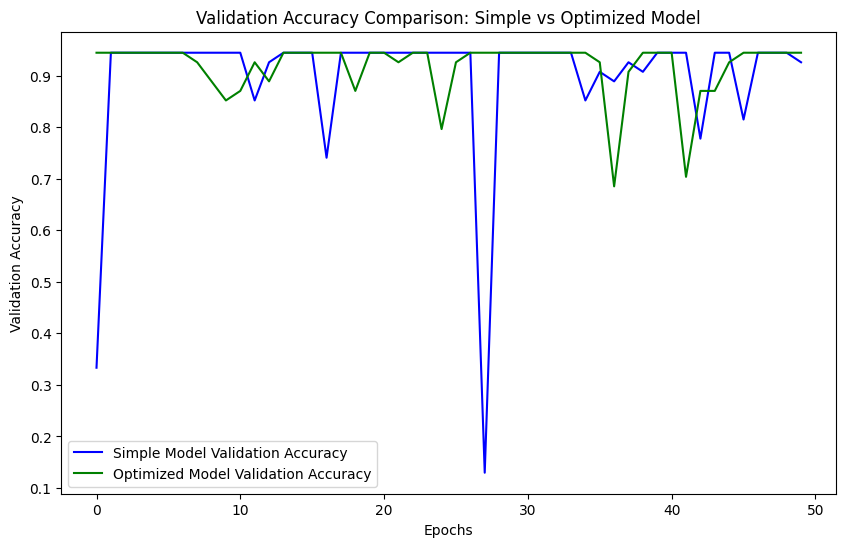

In [11]:
# Import necessary Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the simple model
simple_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the simple model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the simple model
history_simple = simple_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Define the optimized model (more layers and regularization, for example)
optimized_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # More complex layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the optimized model
optimized_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the optimized model
history_optimized = optimized_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the validation accuracy for both models
plt.figure(figsize=(10, 6))
plt.plot(history_simple.history['val_accuracy'], label='Simple Model Validation Accuracy', color='blue')
plt.plot(history_optimized.history['val_accuracy'], label='Optimized Model Validation Accuracy', color='green')

# Labeling the graph
plt.title('Validation Accuracy Comparison: Simple vs Optimized Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

# Save the graph as an image file
plt.savefig('validation_accuracy.png')

# Show the plot
plt.show()
